# Лабораторная работа №3
Выполил: Лялин Илья Евгеньевич

# 1) Установим tf-keras-vis

In [1]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.9 MB/s eta 0:00:00


# 2) Установим необходимые библиотеки

In [8]:
#  для работы с многомерными массивами и математическими операциями
import numpy as np

# для построения графиков и визуализации изображений
from matplotlib import pyplot as plt

# для применения различных цветовых схем к визуализациям
from matplotlib import cm

# для работы с нейронными сетями и глубоким обучением
import tensorflow as tf

# для создания тепловых карт активации (Gradient-weighted Class Activation Mapping)
from tf_keras_vis.gradcam import Gradcam

#  для загрузки изображений из файлов
from tensorflow.keras.preprocessing.image import load_img

#  предварительная обработка изображений, специфично для модели VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# предобученная модель VGG16
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# для модификации модели - замены активации выходного слоя на линейную
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# для работы с категориальными оценками (score) для определенных классов
from tf_keras_vis.utils.scores import CategoricalScore

# для создания карт значимости (saliency maps)
from tf_keras_vis.saliency import Saliency

# улучшенная версии Grad-CAM - Grad-CAM++ для более точных тепловых карт
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

Grad-CAM и Grad-CAM++ - показывают, какие области изображения наиболее важны для классификации

Saliency maps - визуализируют градиенты, показывая, какие пиксели наиболее влияют на предсказание

# 3) Заугрзим предобученную модель  VGG16

In [9]:
# архитектура модели VGG16 из модуль tensorflow.keras.applications.vgg16
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Создание экземпляра модели VGG16 с указанием параметров:
# weights='imagenet' - загрузка предобученных весов, обученных на dataset ImageNet
# include_top=True - включение полносвязных слоев классификатора на вершине сети
# (если False, то модель возвращается без финальных слоев, только feature extractor)
model = Model(weights='imagenet', include_top=True)

# Вывод текстового представления архитектуры модели, включая:
# - последовательность слоев модели
# - выходную форму (shape) каждого слоя
# - количество обучаемых параметров в каждом слое
# - общее количество параметров модели
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# 4) Выбираем 4 изображения и отобразим их

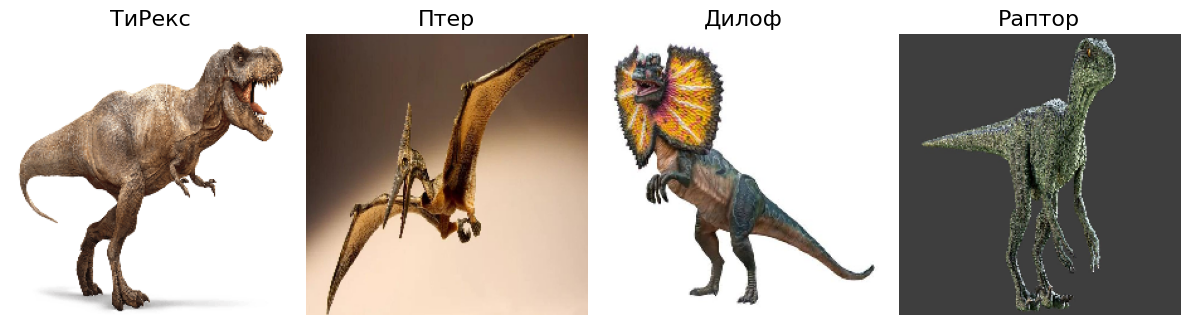

In [76]:
# для загрузки изображений из файлов
from tensorflow.keras.preprocessing.image import load_img

#  функция предварительной обработки изображений для модели VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

image_titles = ['ТиРекс', 'Птер', 'Дилоф', 'Раптор']

# Загрузка изображений из файла '11.png' с изменением размера до 224x224 пикселей
# (размер, требуемый моделью VGG16)
img0 = load_img('11.png', target_size=(224, 224))
img1 = load_img('22.jpg', target_size=(224, 224))
img2 = load_img('3.jpg', target_size=(224, 224))
img3 = load_img('4.jpg', target_size=(224, 224))

# Преобразование загруженных изображений в массив NumPy и объединение в один массив
# Каждое изображение преобразуется в массив формы (224, 224, 3)
# Результирующий массив images имеет форму (4, 224, 224, 3)
images = np.asarray([np.array(img0), np.array(img1), np.array(img2), np.array(img3)])

# Предварительная обработка изображений для подготовки к подаче в модель VGG16:
# - Нормализация значений пикселей по спецификации VGG16
# - Вычитание средних значений каналов (BGR)
# - Инвертирование порядка каналов (RGB -> BGR)
X = preprocess_input(images)

# Создание фигуры с 4 подграфиками (1 строка, 4 столбца)
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по всем изображениям и соответствующим заголовкам
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    # Отключение отображения осей координат для лучшей визуализации
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# 5) Заменим функцию активации на линейную

In [77]:
# для модификации модели путем замены активации выходного слоя на линейную функцию
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

# Создание экземпляра класса ReplaceToLinear
# Этот объект будет использоваться для модификации модели
replace2linear = ReplaceToLinear()

# Определение пользовательской функции-модификатора модели
# Функция принимает один параметр - клонированную модель
def model_modifier_function(cloned_model):
    # Обращение к последнему слою модели (выходному слою) через cloned_model.layers[-1]
    # и замена его функции активации на линейную (tf.keras.activations.linear)
    cloned_model.layers[-1].activation = tf.keras.activations.linear

Для методов визуализации (Grad-CAM, Saliency maps) нужны "сырые" значения до применения softmax

Softmax сжимает выходы в диапазон [0,1], что может маскировать важные градиенты

Линейная активация сохраняет исходные логиты (logits), что улучшает качество визуализаций

Без этой модификации градиенты могут быть слишком малыми для эффективной визуализации

# 6) Создадим функцию очков соответсвия каждому изображению

In [78]:
# для работы с категориальными оценками (scores)
# для указания оценки, какие классы нас интересуют
from tf_keras_vis.utils.scores import CategoricalScore

# Создание объекта CategoricalScore с указанием индексов целевых классов ImageNet
# [388, 390, 397, 389] - индексы классов в наборе данных ImageNet (1000 классов)
# Каждый индекс соответствует определенному классу объектов
score = CategoricalScore([388, 390, 397, 389])

# Функция принимает выход модели (output) и возвращает оценки для конкретных классов
def score_function(output):
    return (output[0][388], output[1][390], output[2][397], output[3][389])

# 7) Создадим карту внимания (vanilla)

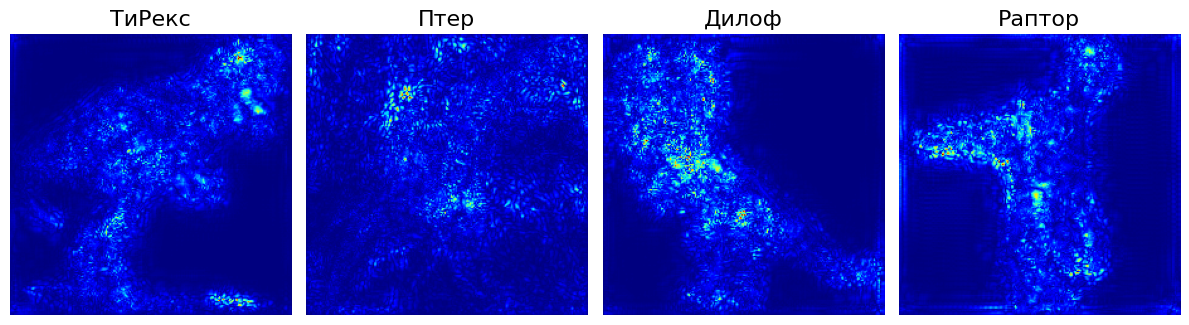

In [79]:
# для создания карт значимости (saliency maps)
# Saliency maps показывают, какие пиксели изображения наиболее важны для предсказания модели
from tf_keras_vis.saliency import Saliency

# Создание экземпляра класса Saliency с параметрами:
# model - модель VGG16, для которой будут строиться карты значимости
# model_modifier=replace2linear - модификатор, заменяющий активацию выходного слоя на линейную
# clone=True - создание клона модели для безопасной модификации (оригинальная модель не изменяется)
saliency = Saliency(model, model_modifier=replace2linear, clone=True)

# Вычисление карт значимости для заданных оценок и входных изображений:
# score - объект CategoricalScore с индексами целевых классов
# X - предобработанные изображения для модели
# saliency_map - результат вычислений, массив карт значимости для каждого изображения
saliency_map = saliency(score, X)

# Создание фигуры с 4 подграфиками (1 строка, 4 столбца) размером 12x4 дюйма
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по всем изображениям и соответствующим заголовкам
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)

    # Отображение карты значимости для текущего изображения
    # cmap='jet' - использование цветовой карты "jet" для лучшей визуализации интенсивности
    # Более теплые цвета (красный/желтый) показывают области высокой значимости
    # Более холодные цвета (синий) показывают области низкой значимости
    ax[i].imshow(saliency_map[i], cmap='jet')

    # Отключение отображения осей координат для лучшей визуализации
    ax[i].axis('off')
plt.tight_layout()
plt.show()

Что такое Saliency Maps:

Карты значимости показывают, какие пиксели входного изображения наиболее сильно влияют на выходное предсказание модели

Рассчитываются через градиенты выхода по входному изображению

Области с высокими значениями градиента = важные для классификации регионы

# 8) Уменьшим шум для карт влияния

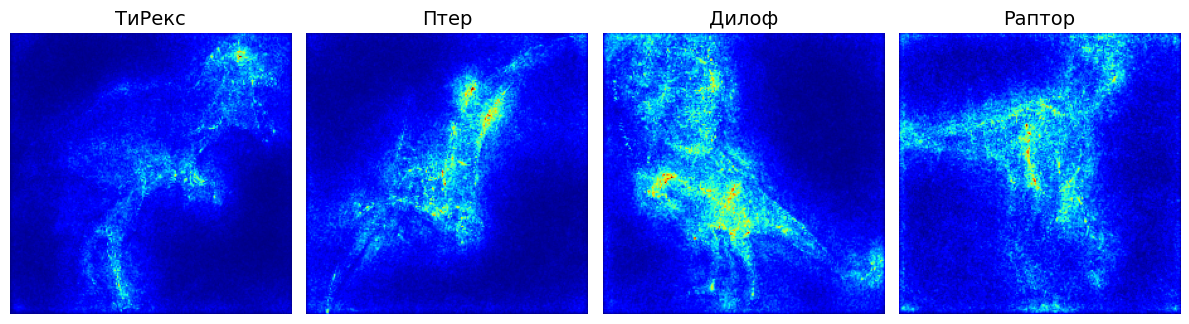

CPU times: user 2.54 s, sys: 104 ms, total: 2.64 s
Wall time: 3.75 s


In [80]:
%%time

# Вычисление карт значимости с дополнительными параметрами сглаживания:
# score - целевые классы для которых вычисляются значимости
# X - входные изображения
# smooth_samples=20 - количество сэмплов для SmoothGrad метода (20 итераций)
# smooth_noise=0.20 - уровень добавляемого шума (20% от диапазона значений)
# SmoothGrad улучшает качество карт значимости путем усреднения нескольких noisy версий
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)

# Создание фигуры с 4 подграфиками (1 строка, 4 столбца) размером 12x4 дюйма
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по всем изображениям и соответствующим заголовкам
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=14)

    # Отображение сглаженной карты значимости для текущего изображения
    # cmap='jet' - использование цветовой карты "jet" для визуализации интенсивности
    ax[i].imshow(saliency_map[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('smoothgrad.png')
plt.show()

Проблема обычных saliency maps:

Могут быть "зашумленными" и содержать много случайных пикселей

Градиенты могут быть нестабильными для небольших изменений входа

SmoothGrad:

smooth_samples=20 - создает 20 слегка зашумленных версий каждого изображения

smooth_noise=0.20 - добавляет гауссов шум с стандартным отклонением 20% от диапазона значений пикселей

Усредняет карты значимости по всем noisy версиям

Преимущества:

Уменьшение шума - случайные активации усредняются

Улучшение визуализации - остаются только устойчиво важные регионы

Более четкие границы - объекты выделяются яснее

# 9) Используем GrandCAM

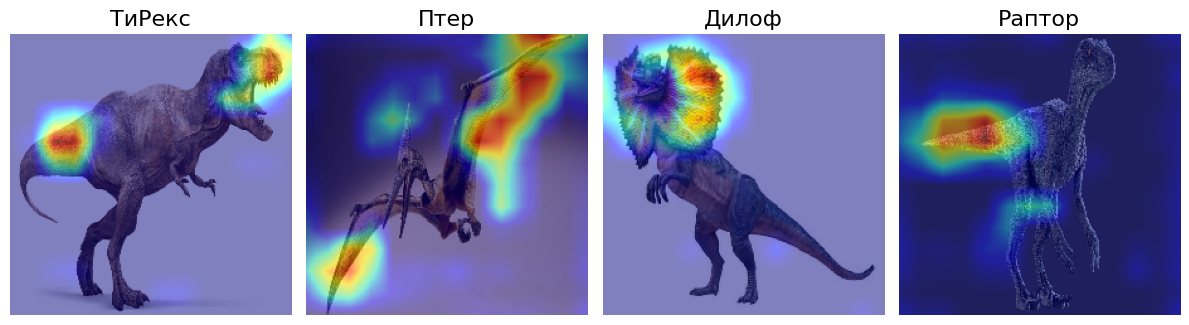

In [81]:
# для преобразования значений в цвета
from matplotlib import cm

# для создания тепловых карт активации (Gradient-weighted Class Activation Mapping)
from tf_keras_vis.gradcam import Gradcam

# Создание экземпляра класса Gradcam с параметрами:
# model - модель VGG16 для анализа
# model_modifier=replace2linear - модификатор с линейной активацией на выходе
# clone=True - создание клона модели для безопасной модификации
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)

# Вычисление Grad-CAM карт для заданных оценок и изображений:
# score - целевые классы для анализа
# X - предобработанные входные изображения
# penultimate_layer=-1 - использование последнего сверточного слоя модели для вычислений
# (в VGG16 это блок conv5 перед полносвязными слоями)
cam = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по всем изображениям и заголовкам
for i, title in enumerate(image_titles):
    # Преобразование карты активации в цветовое представление:
    # cm.jet(cam[i]) - применение цветовой карты "jet" к значениям карты активации
    # [..., :4] - выбор только RGBα каналов (игнорирование возможного пятого канала)
    # np.uint8(... * 255) - преобразование значений из [0,1] в [0,255] в формате uint8
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)

    ax[i].set_title(title, fontsize=16)

    ax[i].imshow(images[i])

    # Наложение тепловой карты поверх исходного изображения:
    # cmap='jet' - цветовая схема тепловой карты
    # alpha=0.5 - уровень прозрачности 50% для лучшего визуального совмещения
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay

    ax[i].axis('off')
plt.tight_layout()
plt.show()

**Что такое Grad-CAM:**

Gradient-weighted Class Activation Mapping - метод визуализации важных регионов

Показывает, какие области последнего сверточного слоя активируются для конкретного класса

Использует градиенты целевого класса по активациям карт признаков

**Ключевые параметры:**

penultimate_layer=-1 - автоматический выбор последнего сверточного слоя

В VGG16 это слой block5_conv3 перед полносвязными слоями

**Процесс создания heatmap:**

Вычисляются градиенты целевого класса по активациям выбранного слоя

Карты признаков взвешиваются по важности (через глобальный average pooling градиентов)

Получается локализация важных регионов


На визуализации будут видны цветные полупрозрачные области, показывающие, какие части каждого динозавра наиболее важны для модели при классификации на соответствующие классы ImageNet.

# 10) Используем GradCAM++

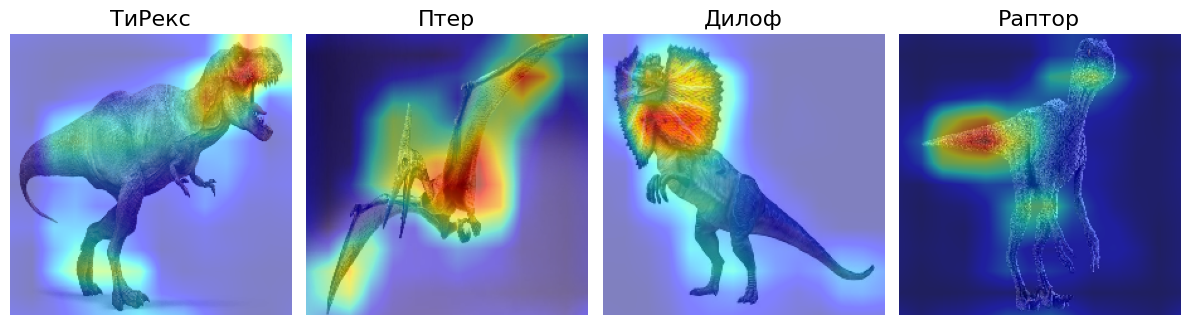

In [82]:
# Grad-CAM++ предлагает усовершенствования оригинального метода Grad-CAM
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

# Создание экземпляра класса GradcamPlusPlus с параметрами:
# model - модель VGG16 для анализа
# model_modifier=replace2linear - модификатор с линейной активацией на выходе
# clone=True - создание клона модели для безопасной модификации
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)

# Вычисление Grad-CAM++ карт для заданных оценок и изображений:
# score - целевые классы для анализа
# X - предобработанные входные изображения
# penultimate_layer=-1 - использование последнего сверточного слоя модели
cam = gradcam(score, X, penultimate_layer=-1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Цикл по всем изображениям и заголовкам
for i, title in enumerate(image_titles):
    # Преобразование карты активации в цветовое представление:
    # cm.jet(cam[i]) - применение цветовой карты "jet" к значениям карты активации
    # [..., :4] - выбор RGBα каналов
    # np.uint8(... * 255) - преобразование в 8-битный формат [0,255]
    heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)

    ax[i].set_title(title, fontsize=16)

    ax[i].imshow(images[i])

    # Наложение тепловой карты Grad-CAM++ поверх исходного изображения:
    # cmap='jet' - цветовая схема тепловой карты
    # alpha=0.5 - уровень прозрачности 50%
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.savefig('gradcam_plus_plus.png')
plt.show()

**Более точная локализация:**

Лучше определяет границы важных объектов

Меньше "размытия" по изображению

**Улучшенное взвешивание градиентов:**

Использует более сложную формулу для взвешивания карт признаков

Учитывает не только средние градиенты, но и их высшие моменты

**Лучшая обработка нескольких объектов:**

Эффективнее когда в изображении присутствует несколько объектов одного класса

Для анализа и отладки компьютерного зрения применяются методы объяснимого ИИ. Grad-CAM и его улучшенная версия Grad-CAM++ визуализируют участки изображения, наиболее влияющие на предсказание модели. Когда карты значимости содержат много помех, SmoothGrad сглаживает шум, повышая качество интерпретации. Эти подходы позволяют заглянуть "внутрь" черного ящика нейросетей и понять их механизм принятия решений.